(b'BM', 66614, 0, 1078, 40, 256, 256, 1, 8, 0, 0, 0, 0, 256, 256)
b'BM\x00\x01\x046\x00\x00\x00\x00\x00\x00\x046\x00\x00\x00(\x00\x00\x01\x00\x00\x00\x01\x00\x00\x01\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x01\x00'
(b'BM', 66614, 0, 0, 1078, 40, 256, 256, 1, 8, 0, 0, 0, 0, 256, 256)
tag      :b'BM'
fileSize :66614
rgbOffset:1078
infoSize :40
width    :256
height   :256
pane     :1
color    :8
compress :0
rgbSize  :0
(b'BM', 66614, 0, 1078, 40, 256, 256, 1, 8, 0, 0, 0, 0, 256, 256)


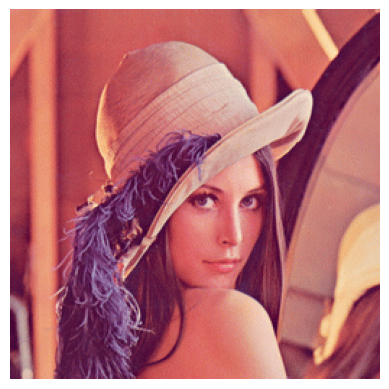

In [19]:
import struct  # 用于读取字节。
import matplotlib.image as mpimg  # mpimg 用于读取图片
import matplotlib.pyplot as plt  # plt 用于显示图片
import numpy as np # numpy


class bmp:
    def __init__(self, tp):
        self.tag = tp[0]  # 标签
        self.fileSize = tp[1]  # 文件大小
        self.rgbOffset = tp[4]  # rgb偏移量
        self.infoSize = tp[5]  # 头部所需字节
        self.width = tp[6]  # 宽度
        self.height = tp[7]  # 高度
        self.pane = tp[8]  # 颜色板
        self.color = tp[9]  # 颜色种类
        self.compress = tp[10]  # 压缩
        self.rgbSize = tp[11]  # rgb大小
        print(tp)

    def print_bmp_header(self):
        print("tag      :{}".format(self.tag))
        print("fileSize :{}".format(self.fileSize))
        print("rgbOffset:{}".format(self.rgbOffset))
        print("infoSize :{}".format(self.infoSize))
        print("width    :{}".format(self.width))
        print("height   :{}".format(self.height))
        print("pane     :{}".format(self.pane))
        print("color    :{}".format(self.color))
        print("compress :{}".format(self.compress))
        print("rgbSize  :{}".format(self.rgbSize))


f = open('Lena.bmp', 'rb')
bmp_header_b = f.read(0x36)
new_header_s = struct.unpack('<2s6I2H6I', bmp_header_b)
bmp_header_s = struct.unpack('<2sI2H4I2H6I', bmp_header_b)  # 按bmp的数据形式解包
image = bmp(bmp_header_s)
image.print_bmp_header()
f.close()

f = open('Lena.bmp','rb')
# 读取颜色表
color_table = np.empty(shape=[256,4],dtype=int)
f.seek(0x36) # 跳过文件信息头和位图信息头
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0]
    g = struct.unpack('B', f.read(1))[0]
    r = struct.unpack('B', f.read(1))[0]
    alpha = struct.unpack('B', f.read(1))[0]
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = alpha
f.close()

# 打开文件
f = open("Lena.BMP",'rb') 

# 读取BMP位图数据区域,将数据存入numpy数组
# 首先对文件指针进行偏移
f.seek(1078)
# 因为图像是8位伪彩色图像，所以一个像素点占一个字节，即8位
img = np.empty(shape=[256, 256], dtype=int)
count = 0
for y in range(0, 256):
    for x in range(0, 256):
        count = count + 1
        index=struct.unpack('B',f.read(1))[0]
        img[256-y-1, x] = index
    while (count % 4) != 0:
        f.read(1)
        count = count + 1
f.close()

f = open("test.BMP", "wb")
print(new_header_s)
f.write(struct.pack('<2s6I2H6I', *new_header_s))
for i in range(0,256):
    f.write(struct.pack('B', color_table[i][2]))  # b
    f.write(struct.pack('B', color_table[i][1]))  # g
    f.write(struct.pack('B', color_table[i][0]))  # r
    f.write(struct.pack('B', color_table[i][3]))  # alpha
count = 0
for y in range(0, 256):
    for x in range(0, 256):
        count = count + 1
        f.write(struct.pack('B', img[256-y-1, x]))
    while (count % 4) != 0:
        f.write('B', 0)
        count = count + 1
f.close()

car = mpimg.imread('Lena.bmp')

car.shape  # (512, 512, 3)

plt.imshow(car)  # 显示图片
plt.axis('off')  # 不显示坐标轴
plt.show()


类型: b'BM' 
大小: 66614 
保留大小: 0 
位图数据偏移量: 1078 
位图信息头大小: 40 
宽度: 256 
高度: 256 
位图像素位数: 8


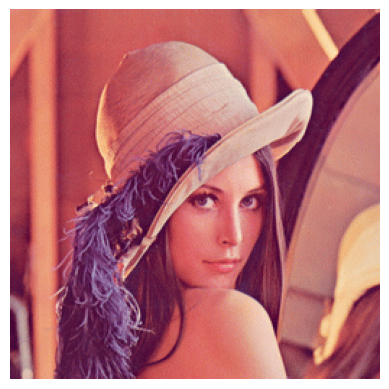

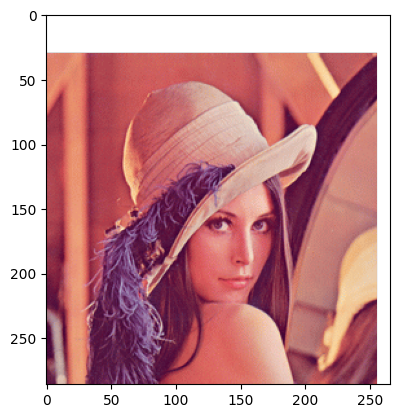

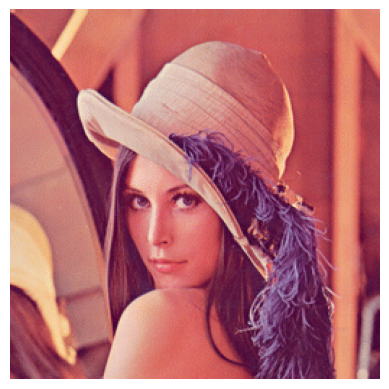

In [13]:
import  numpy as np
import struct
import matplotlib.pyplot as plt

class bmp_header:

    def __init__(self, f_type, f_sizeByte, f_reserved,
                f_offsetByte, f_bih_size, f_width, 
                f_height, f_bitcount):
        self.type = f_type
        self.sizeByte = f_sizeByte
        self.reserved = f_reserved
        self.offsetByte = f_offsetByte
        self.bihSize = f_bih_size
        self.width = f_width
        self.height = f_height
        self.bitcount = f_bitcount

    def printBitMapHeaderInfo(self):
            print("类型:", self.type, 
                "\n大小:", self.sizeByte,
                "\n保留大小:", self.reserved,
                "\n位图数据偏移量:", self.offsetByte,
                "\n位图信息头大小:", self.bihSize,
                "\n宽度:", self.width,
                "\n高度:", self.height,
                "\n位图像素位数:", self.bitcount)

class bmp:
    def __init__(self, filename):
        self.fileName = filename

    def loadBmp(self):
        self.__loadBmpFileHeader()
        self.__loadBmpColorsTable()
        self.__loadBmpBits()

    def drawBmp(self):
        plt.imshow(self.img)
        plt.axis('off')  # 不显示坐标轴
        plt.show()

    def translateBmp(self, x=0, y=0):
        '''
        x平移量表示左右移动:x>0,图像右移; x<0,图像左移
        y平移量表示上下移动:y>0,图像下移; y<0,图像上移
        '''
        newImg = np.empty(shape=(self.bmpHeader.height+abs(y), self.bmpHeader.width+abs(x), 4), dtype= int)
        dx = x if (x>0) else 0
        dy = y if (y>0) else 0
        
        for i in range(0, self.bmpHeader.height):
            for j in range(0, self.bmpHeader.width):
                newImg[i+dy][j+dx] = self.img[i][j]

        plt.imshow(newImg)
        plt.show()
        
    def mirrorImageReversal(self, option='LeftAndRight'):
        if option=='LeftAndRight':
            newImg = np.empty(shape=(self.bmpHeader.height, self.bmpHeader.width, 4), dtype= int)
            for i in range(0, self.bmpHeader.height):
                for j in range(0, self.bmpHeader.width):
                    newImg[i, j] = self.img[i, 255-j]
        elif option=='UpAndDown':
            newImg = np.empty(shape=(self.bmpHeader.height, self.bmpHeader.width, 4), dtype= int)
            for i in range(0, self.bmpHeader.height):
                for j in range(0, self.bmpHeader.width):
                    newImg[i, j] = self.img[255-i, j]
        elif option=='BothReversal':
            newImg = np.empty(shape=(self.bmpHeader.width, self.bmpHeader.height, 4), dtype= int)
            for i in range(0, self.bmpHeader.height):
                for j in range(0, self.bmpHeader.width):
                    newImg[i, j] = self.img[255-i, 255-j]
        
        plt.imshow(newImg)
        plt.axis('off')
        plt.show()
                

    def __loadBmpFileHeader(self):
        '''读取位图信息
        '''
        f = open(self.fileName,'rb') 
        '下面部分用来读取BMP位图的基础信息'
        f_type = str(f.read(2))                     # 文件类型 需要读取2个字节
        file_size_byte = f.read(4)                  # 读取文件的大小 需要读取4个字节
        file_reserved = f.read(4)                   # 保留字段
        file_ofset_byte = f.read(4)                 # 读取位图数据的偏移量
        file_bmpInfoHeader_size = f.read(4)         # 读取位图信息头长度
        file_wide_byte = f.read(4)                  # 读取宽度字节
        file_height_byte = f.read(4)                # 读取高度字节
        file_planes = f.read(2)                     # 读取位图位面数，忽略
        file_bitcount_byte = f.read(4)              # 得到每个像素占位大小

        # 下面就是将读取的字节转换成指定的类型
        f_size, = struct.unpack('l',file_size_byte)
        f_reserved, = struct.unpack('i', file_reserved)
        f_offset, = struct.unpack('l',file_ofset_byte)
        f_bih_size, = struct.unpack('i', file_bmpInfoHeader_size)
        f_wide, = struct.unpack('l',file_wide_byte)
        f_height, = struct.unpack('l',file_height_byte)
        f_bitcount, = struct.unpack('i',file_bitcount_byte)

        self.bmpHeader = bmp_header(f_type, f_size, f_reserved, f_offset, 
                                    f_bih_size, f_wide, f_height, f_bitcount)
        f.close()

    def __loadBmpColorsTable(self):
        f = open(self.fileName,'rb')
        # 读取颜色表
        self.color_table = np.empty(shape=[256,4],dtype=int)
        f.seek(54) # 跳过文件信息头和位图信息头
        for i in range(0,256):
            b = struct.unpack('B',f.read(1))[0];
            g = struct.unpack('B', f.read(1))[0];
            r = struct.unpack('B', f.read(1))[0];
            alpha = struct.unpack('B', f.read(1))[0];
            self.color_table[i][0] = r
            self.color_table[i][1] = g
            self.color_table[i][2] = b
            self.color_table[i][3] = 255
        f.close()
        
    # 显示，灰度化，读图像信息
    def __loadBmpBits(self):
        # 打开文件
        f = open(self.fileName,'rb') 

        # 读取BMP位图数据区域,将数据存入numpy数组
        # 首先对文件指针进行偏移
        f.seek(self.bmpHeader.offsetByte)
        # 因为图像是8位伪彩色图像，所以一个像素点占一个字节，即8位
        self.img = np.empty(shape=[self.bmpHeader.height, self.bmpHeader.width, 4], dtype=int)
        cout = 0
        for y in range(0, self.bmpHeader.height):
            for x in range(0, self.bmpHeader.width):
                cout = cout + 1
                index=struct.unpack('B',f.read(1))[0]
                self.img[self.bmpHeader.height-y-1, x] = self.color_table[index]
            while (cout % 4) != 0:
                f.read(1)
                cout = cout + 1
        f.close()


    

def main():
    m_bmp = bmp("Lena.BMP")
    m_bmp.loadBmp()
    m_bmp.bmpHeader.printBitMapHeaderInfo()
    m_bmp.drawBmp()
    m_bmp.translateBmp(-10, 30)
    m_bmp.mirrorImageReversal('LeftAndRight')


if __name__ == '__main__':
    main()


In [ ]:
# 图像平移
import  numpy as np
import struct
import matplotlib.pyplot as plt

imgMatrix = np.empty(shape=(256,256,4), dtype=int)  # 实际为[y, x]
newImgMatrix = np.empty(shape=(270,280,4), dtype=int)
count = 0
f = open("Lena.BMP",'rb')
# 读取颜色表
color_table = np.empty(shape=[256,4],dtype=int)
f.seek(54) # 跳过文件信息头和位图信息头
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0];
    g = struct.unpack('B', f.read(1))[0];
    r = struct.unpack('B', f.read(1))[0];
    alpha = struct.unpack('B', f.read(1))[0];
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = 255

with open("Lena.BMP", 'rb') as bmpfile:
    f.seek(0x436)
    for y in range(0, 256):
        for x in range(0, 256):
            count += 1
            index = struct.unpack('B', f.read(1))[0]
            imgMatrix[256 - y - 1, x] = color_table[index]
        while(count%4 != 0):
            count += 1
            f.read(1)

plt.imshow(imgMatrix)
plt.show()

for i in range(0, 256):
    for j in range(0, 256):
        newImgMatrix[i+14, j+24] = imgMatrix[i][j]

plt.imshow(newImgMatrix)
plt.show()

In [ ]:
#灰度化
import  numpy as np
import struct
import matplotlib.pyplot as plt

imgMatrix = np.empty(shape=(256,256,4), dtype=int)  # 实际为[y, x]
newImgMatrix = np.empty(shape=(256,256,4), dtype=int)
count = 0
f = open("Lena.BMP",'rb')
# 读取颜色表
color_table = np.empty(shape=[256,4],dtype=int)
f.seek(54) # 跳过文件信息头和位图信息头
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0];
    g = struct.unpack('B', f.read(1))[0];
    r = struct.unpack('B', f.read(1))[0];
    alpha = struct.unpack('B', f.read(1))[0];
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = 255

with open("Lena.BMP", 'rb') as bmpfile:
    f.seek(0x436)
    for y in range(0, 256):
        for x in range(0, 256):
            count += 1
            index = struct.unpack('B', f.read(1))[0]
            imgMatrix[256 - y - 1, x] = color_table[index]
        while(count%4 != 0):
            count += 1
            f.read(1)

plt.imshow(imgMatrix)
plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
newImgMatrix2 = rgb2gray(imgMatrix)
plt.imshow(newImgMatrix2, cmap=plt.get_cmap('gray'))
plt.show()


hdDict = dict()

for i in range(0, 256):
    for j in range(0, 256):
        newImgMatrix[i, j][3] = imgMatrix[i][j][0]*299/1000 + imgMatrix[i][j][1]*587/1000 + imgMatrix[i][j][2]*114/1000
        hdDict[newImgMatrix[i, j][3]] = hdDict.get(newImgMatrix[i, j][3], 0) + 1
        newImgMatrix[i, j][0] = newImgMatrix[i, j][1] = newImgMatrix[i, j][2] = 0

def sort_by_key(d):
    '''
    d.items() 返回元素为 (key, value) 的可迭代类型（Iterable），
    key 函数的参数 k 便是元素 (key, value)，所以 k[0] 取到字典的键。
    '''
    return sorted(d.items(), key=lambda k: k[0])


sortedDict = dict(sort_by_key(hdDict))

plt.bar(list(sortedDict.keys()), sortedDict.values(), color='gray')
plt.show()

for i in range(0, 256):
    for j in range(0, 256):
        if(newImgMatrix[i,j][3] >= 128):
            newImgMatrix[i, j][3] = 255
        else:
            newImgMatrix[i, j][3] = 0

plt.imshow(newImgMatrix)
plt.show()

In [ ]:
import PIL.Image as PILImage
import matplotlib.pyplot as plt

img = PILImage.open("Lena.BMP")
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = rgb2gray(img)
plt.imshow(img)
plt.show()


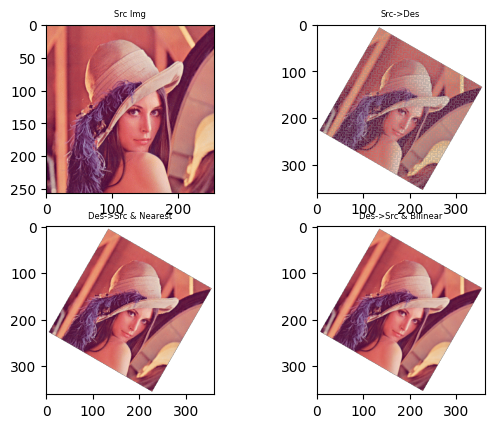

In [23]:
#图像旋转
import antigravity
from math import cos, sin
import  numpy as np
import struct
import matplotlib.pyplot as plt

imgMatrix = np.empty(shape=(256,256,4), dtype=int)  # 实际为[y, x]
newImgMatrix = np.empty(shape=(256,256,4), dtype=int)
count = 0
f = open("Lena.BMP",'rb')
# 读取颜色表
color_table = np.empty(shape=[256,4],dtype=int)
f.seek(54) # 跳过文件信息头和位图信息头
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0];
    g = struct.unpack('B', f.read(1))[0];
    r = struct.unpack('B', f.read(1))[0];
    alpha = struct.unpack('B', f.read(1))[0];
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = 255

with open("Lena.BMP", 'rb') as bmpfile:
    f.seek(0x436)
    for y in range(0, 256):
        for x in range(0, 256):
            count += 1
            index = struct.unpack('B', f.read(1))[0]
            imgMatrix[256 - y - 1, x] = color_table[index]
        while(count%4 != 0):
            count += 1
            f.read(1)

def getNewWidthAndHeight(width, height, theta):
    angle = theta*np.pi/180
    newWidth = int(width * abs(cos(angle)) + height * abs(sin(angle)))
    newHeight = int(width * abs(sin(angle)) + height * abs(cos(angle)))
    return (newWidth+1, newHeight+1)

angle = 30*np.pi/180
# 设置新的图像大小
h,w = imgMatrix.shape[0],imgMatrix.shape[1]
newW, newH = getNewWidthAndHeight(imgMatrix.shape[0], imgMatrix.shape[1], 40)

# Attention dtype
newimg1 = np.zeros((newH,newW, 4),dtype = int)
newimg2 =  np.zeros((newH,newW, 4),dtype = int)
newimg3 =  np.zeros((newH,newW, 4),dtype = int)

# 设置旋转矩阵 scr -> dex
trans1 = np.array([[1,0,0],[0,-1,0],[-0.5*w,0.5*h,1]])
trans1 = trans1.dot(np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]]))
trans1 = trans1.dot(np.array([[1,0,0],[0,-1,0],[0.5*newW,0.5*newH,1]]))

# des -> src,求原坐标
trans2 = np.array([[1,0,0],[0,-1,0],[-0.5*newW,0.5*newH,1]])
trans2 = trans2.dot(np.array([[np.cos(angle),np.sin(angle),0],[-np.sin(angle),np.cos(angle),0],[0,0,1]]))
trans2 = trans2.dot(np.array([[1,0,0],[0,-1,0],[0.5*w,0.5*h,1]]))

# 开始旋转
for x in range(w):
    for y in range(h):
        newPos = np.array([x,y,1]).dot(trans1)
        newimg1[int(newPos[1])][int(newPos[0])] = imgMatrix[y][x]

for x in range(newW):
    for y in range(newH):
        srcPos = np.array([x,y,1]).dot(trans2)
        if srcPos[0] >= 0 and srcPos[0] < w and srcPos[1] >= 0 and srcPos[1] < h:
            # 最邻近内插
            newimg2[y][x] = imgMatrix[int(srcPos[1])][int(srcPos[0])]
            # 双线性内插
            bix,biy = int(srcPos[0]),int(srcPos[1]) # 取左上角坐标
            # 避免最后一行溢出
            if bix < w-1 and biy < h-1:
                # 沿 X 方向线性内插
                rgbX1 = imgMatrix[biy][bix] + (imgMatrix[biy][bix+1] - imgMatrix[biy][bix])*(srcPos[0]-bix)
                rgbX2 = imgMatrix[biy+1][bix] + (imgMatrix[biy+1][bix+1] - imgMatrix[biy+1][bix])*(srcPos[0]-bix)
                # 沿 Y  方向内插
                rgb = rgbX1 + (rgbX2-rgbX1)*(srcPos[1]-biy)
                newimg3[y][x] = rgb

# 绘图
sub = plt.subplot(2,2,1)
sub.set_title("Src Img", fontsize = 6)
plt.imshow(imgMatrix)
sub = plt.subplot(2,2,2)
sub.set_title("Src->Des", fontsize = 6)
plt.imshow(newimg1)
sub = plt.subplot(2,2,3)
sub.set_title("Des->Src & Nearest", fontsize = 6)
plt.imshow(newimg2)
sub = plt.subplot(2,2,4)
sub.set_title("Des->Src & Bilinear", fontsize = 6)
plt.imshow(newimg3)
plt.show()
